In [1]:
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder

TRAINING_DIR = "/Users/quanghuypham/Desktop/SC numpy 20k bee dataset/train"
VALIDATION_DIR = "/Users/quanghuypham/Desktop/SC numpy 20k bee dataset/val"
TEST_DIR = "/Users/quanghuypham/Desktop/SC numpy 20k bee dataset/test"

def load_data(directory):
    sc_features = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if not os.path.isdir(label_dir):
            continue
        for filename in os.listdir(label_dir):
            file_path = os.path.join(label_dir, filename)
            if not os.path.isfile(file_path):
                continue
            sc = np.load(file_path)
            sc_features.append(sc)
            labels.append(label)
    return sc_features, labels

train_sc_features, train_labels = load_data(TRAINING_DIR)
val_sc_features, val_labels = load_data(VALIDATION_DIR)
test_sc_features, test_labels = load_data(TEST_DIR)

In [2]:
label_encoder = LabelEncoder()
encoded_train_labels = label_encoder.fit_transform(train_labels)
encoded_val_labels = label_encoder.transform(val_labels)
encoded_test_labels = label_encoder.transform(test_labels)

In [3]:
X_train = np.array(train_sc_features)
y_train = np.array(encoded_train_labels)

X_val = np.array(val_sc_features)
y_val = np.array(encoded_val_labels)

X_test = np.array(test_sc_features)
y_test = np.array(encoded_test_labels)

In [4]:
import numpy as np
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_val_normalized = scaler.transform(X_val)
X_test_normalized = scaler.transform(X_test)


In [5]:
import warnings
warnings.filterwarnings("ignore")

k = 10
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train_normalized, y_train)

y_test_pred = model.predict(X_test_normalized)

predicted_test_labels = label_encoder.inverse_transform(y_test_pred)

accuracy = accuracy_score(test_labels, predicted_test_labels)
report = classification_report(test_labels, predicted_test_labels)

print("Random Forest Classifier:")
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Random Forest Classifier:
Accuracy: 0.80625
Classification Report:
              precision    recall  f1-score   support

       Queen       0.77      0.88      0.82      2000
   Queenless       0.86      0.73      0.79      2000

    accuracy                           0.81      4000
   macro avg       0.81      0.81      0.81      4000
weighted avg       0.81      0.81      0.81      4000



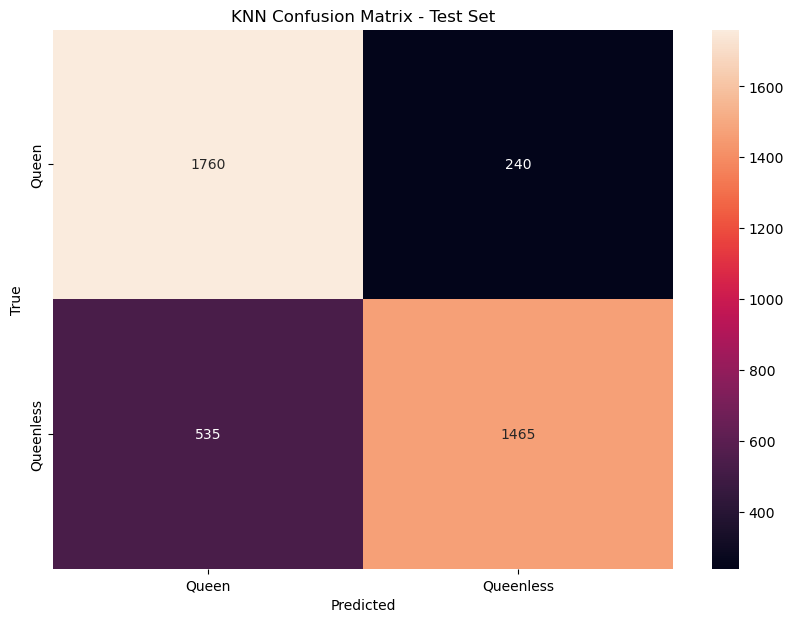

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

class_labels = label_encoder.classes_
confusion_mat_test = confusion_matrix(test_labels, predicted_test_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat_test, annot=True, fmt="", xticklabels=class_labels, yticklabels=class_labels)
plt.title("KNN Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [27]:
import pickle

with open('sc_knn.pkl', 'wb') as f:
    pickle.dump(model, f)